In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df = pd.read_csv('/content/drive/MyDrive/с доп.данными/ready_all_df (2).csv')
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10391 entries, 0 to 10390
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   author                9562 non-null   object
 1   author_type           9571 non-null   object
 2   url                   9904 non-null   object
 3   location              9904 non-null   object
 4   deal_type             9904 non-null   object
 5   accommodation_type    9904 non-null   object
 6   floor                 9904 non-null   object
 7   floors_count          9904 non-null   object
 8   rooms_count           9904 non-null   object
 9   total_meters          9904 non-null   object
 10  price                 9891 non-null   object
 11  year_of_construction  7906 non-null   object
 12  object_type           7906 non-null   object
 13  have_loggia           7906 non-null   object
 14  parking_type          7906 non-null   object
 15  house_material_type   7906 non-null 

In [ ]:
df.columns

Index(['author', 'author_type', 'url', 'location', 'deal_type',
       'accommodation_type', 'floor', 'floors_count', 'rooms_count',
       'total_meters', 'price', 'year_of_construction', 'object_type',
       'have_loggia', 'parking_type', 'house_material_type', 'heating_type',
       'finish_type', 'living_meters', 'kitchen_meters', 'phone',
       'ceiling_height', 'district', 'street', 'house_number', 'underground',
       'residential_complex'],
      dtype='object')

# Очистка данных

Очистка от дубликатов

In [118]:
number_of_duplicates = df.duplicated().sum()
print(f'Количество дубликатов {number_of_duplicates}')

Количество дубликатов 816


In [119]:
df.drop_duplicates(inplace=True)
print(f'Осталось {df.shape[0]} строчек ')

Осталось 9575 строчек 


In [120]:
number_of_duplicates = df.duplicated().sum()
print(f'Количество дубликатов {number_of_duplicates}')

Количество дубликатов 0


видим, что график не соответствует реальности. heating type отсутствует, а все потому что пустые значения заполнены -1 а не nan

<Axes: >

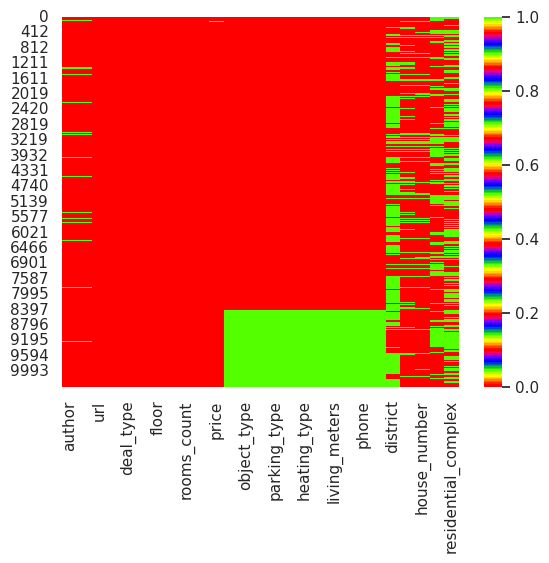

In [121]:
sns.heatmap(df.isnull(), cmap='prism')

Надо заменить все значения '-1' на np.nan в каждой колонке

In [122]:
for column in df.columns:
  df[column].replace('-1', np.nan, inplace=True)

<ipython-input-122-55f6ffa464a1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace('-1', np.nan, inplace=True)


Теперь уже больше похоже на правду. Теперь мы явно видим что вся колонка heating_type отсутствует

<Axes: >

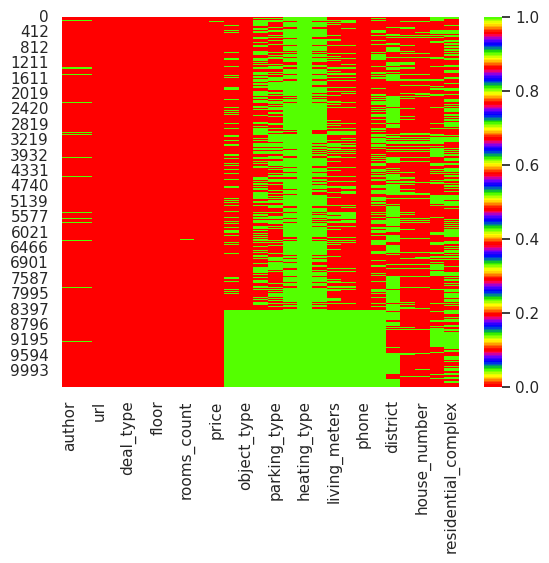

In [123]:
sns.heatmap(df.isnull(), cmap='prism')

Необходимы точные значения в процентах, чтобы понять от каких колонок можно избавиться
Нет смысла работать с колонками, где значения отсутствуют больше чем на 70%

In [124]:
procentage = (df.isnull().sum() / len(df)*100).astype(int)
sort = procentage.sort_values(ascending=False)
sort

,0
heating_type,99
house_material_type,85
finish_type,80
district,60
parking_type,55
have_loggia,54
residential_complex,51
ceiling_height,48
living_meters,38
year_of_construction,34


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
heating_type,9574
house_material_type,8189
finish_type,7666
district,5799
parking_type,5332
have_loggia,5241
residential_complex,4953
ceiling_height,4662
living_meters,3699
year_of_construction,3313


Все что **выше 75** процентов необходимо удалить.
Значит, необходимо удалить колонки `**heating_type**` и `**house_material_type**`  и  **`'finish_type'`**
А также house_number, url и phone

In [125]:
useless_columns = ['house_material_type', 'heating_type', 'finish_type', 'house_number', 'url', 'phone']
for column in useless_columns:
  df.drop([column], axis=1, inplace=True)

<Axes: >

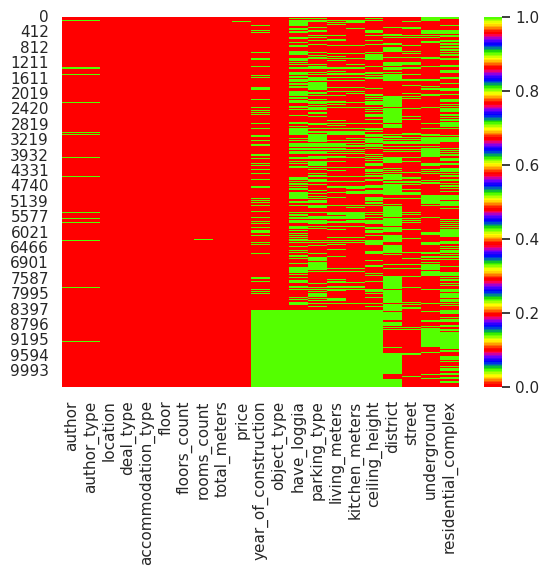

In [126]:
sns.heatmap(df.isnull(), cmap='prism')

# Не все колонки имеют нужные типы.
Нужно понять какие можно оставить типом object а какие преобразовать в int и float**


```
object: 'author', 'author_type', 'url', 'location', 'deal_type',
       'accommodation_type', 'object_type' : object,
       'have_loggia' : object, 'parking_type' : object, 'finish_type' : object,  'phone' : object, , 'district' : object, 'street' : object,
       'house_number', 'underground' : object, 'residential_complex' : object


int: 'floors_count', 'rooms_count', 'price', 'floor', 'year_of_construction'

float:  'total_meters', 'living_meters',
       'kitchen_meters', 'ceiling_height'

```

Прежде чем преобразовать в числовой формат, колонки 'living_meters',
       'kitchen_meters', 'ceiling_height' изменить и убрать обозначение м

In [ ]:
df.head()

,author,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,...,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,ID 115709096,homeowner,Серпухов,sale,flat,6,6,1,20.7,2350000,...,Вторичка,NaN,Наземная,18 м²,1 м²,3 м,Серпухов,Крюкова,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,Серпухов,sale,flat,1,9,1,33.0,4150000,...,Вторичка,NaN,NaN,18 м²,6 м²,"2,7 м",NaN,Ворошилова,Аннино,NaN
2,ID 3246838,realtor,Серпухов,sale,flat,4,4,1,14.0,1700000,...,Вторичка,NaN,NaN,NaN,NaN,NaN,Красный Текстильщик мкр,Красный Текстильщик,NaN,NaN
3,ID 64398571,unknown,Серпухов,sale,flat,5,5,1,17.5,2500000,...,Вторичка,NaN,NaN,NaN,NaN,NaN,Серпухов,Российская,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,Серпухов,sale,flat,4,7,1,25.9,3000000,...,Вторичка,NaN,Наземная,20 м²,5 м²,"3,5 м",Серпухов,Химиков,NaN,NaN


In [127]:
# df['living_meters'] = df['living_meters'].str.replace('\xa0м²', '').str.replace(',', '.').astype(float)
# df['kitchen_meters'] = df['kitchen_meters'].str.replace('\xa0м²', '').str.replace(',', '.').astype(float)
# df['ceiling_height'] = df['ceiling_height'].str.replace('\xa0м', '').str.replace(',', '.').astype(float)

df['living_meters'] = df['living_meters'].str.replace(',', '.')
df['kitchen_meters'] = df['kitchen_meters'].str.replace(',', '.')
df['ceiling_height'] = df['ceiling_height'].str.replace(',', '.')

In [128]:
df['living_meters'] = df['living_meters'].str.replace('\xa0м²', '')
df['kitchen_meters'] = df['kitchen_meters'].str.replace('\xa0м²', '')
df['ceiling_height'] = df['ceiling_height'].str.replace('\xa0м', '')

In [ ]:
df.head()

,author,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,...,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,ID 115709096,homeowner,Серпухов,sale,flat,6,6,1,20.7,2350000,...,Вторичка,NaN,Наземная,18,1,3,Серпухов,Крюкова,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,Серпухов,sale,flat,1,9,1,33.0,4150000,...,Вторичка,NaN,NaN,18,6,2.7,NaN,Ворошилова,Аннино,NaN
2,ID 3246838,realtor,Серпухов,sale,flat,4,4,1,14.0,1700000,...,Вторичка,NaN,NaN,NaN,NaN,NaN,Красный Текстильщик мкр,Красный Текстильщик,NaN,NaN
3,ID 64398571,unknown,Серпухов,sale,flat,5,5,1,17.5,2500000,...,Вторичка,NaN,NaN,NaN,NaN,NaN,Серпухов,Российская,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,Серпухов,sale,flat,4,7,1,25.9,3000000,...,Вторичка,NaN,Наземная,20,5,3.5,Серпухов,Химиков,NaN,NaN


In [129]:
numeric = ['floors_count', 'rooms_count', 'floor', 'total_meters', 'living_meters', 'kitchen_meters', 'ceiling_height', 'price', 'year_of_construction']

for column in numeric:
  df[column] = pd.to_numeric(df[column], errors='coerce')


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9575 entries, 0 to 10390
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                9246 non-null   object 
 1   author_type           9255 non-null   object 
 2   location              9574 non-null   object 
 3   deal_type             9574 non-null   object 
 4   accommodation_type    9574 non-null   object 
 5   floor                 9573 non-null   float64
 6   floors_count          9573 non-null   float64
 7   rooms_count           9477 non-null   float64
 8   total_meters          9573 non-null   float64
 9   price                 9560 non-null   float64
 10  year_of_construction  6209 non-null   float64
 11  object_type           7576 non-null   object 
 12  have_loggia           4334 non-null   object 
 13  parking_type          4243 non-null   object 
 14  living_meters         5875 non-null   float64
 15  kitchen_meters        629

In [ ]:
df.head()

,author,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,...,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,ID 115709096,homeowner,Серпухов,sale,flat,6.0,6.0,1.0,20.7,2350000.0,...,Вторичка,NaN,Наземная,18.0,1.0,3.0,Серпухов,Крюкова,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,Серпухов,sale,flat,1.0,9.0,1.0,33.0,4150000.0,...,Вторичка,NaN,NaN,18.0,6.0,2.7,NaN,Ворошилова,Аннино,NaN
2,ID 3246838,realtor,Серпухов,sale,flat,4.0,4.0,1.0,14.0,1700000.0,...,Вторичка,NaN,NaN,NaN,NaN,NaN,Красный Текстильщик мкр,Красный Текстильщик,NaN,NaN
3,ID 64398571,unknown,Серпухов,sale,flat,5.0,5.0,1.0,17.5,2500000.0,...,Вторичка,NaN,NaN,NaN,NaN,NaN,Серпухов,Российская,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,Серпухов,sale,flat,4.0,7.0,1.0,25.9,3000000.0,...,Вторичка,NaN,Наземная,20.0,5.0,3.5,Серпухов,Химиков,NaN,NaN


Надо заполнить числовые данные с помощью медианы

In [131]:
median = ['total_meters', 'living_meters', 'kitchen_meters',
          'ceiling_height', 'price']

for m in median:
  df[m] = df[m].fillna(df[m].median())

<Axes: >

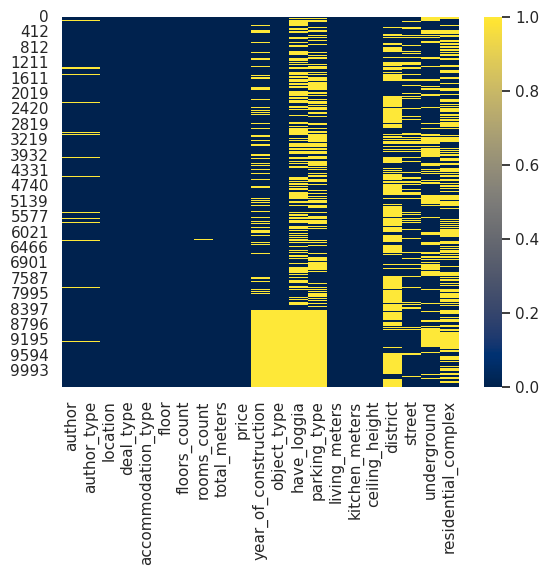

In [132]:
sns.heatmap(df.isnull(), cmap='cividis')

Категориальные заполняем модой

In [133]:
columns_to_fill = ['floors_count', 'rooms_count', 'floor']


for column in columns_to_fill:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

In [134]:
median_value = df['year_of_construction'].median()
median_value = int(median_value)


df['year_of_construction'] = df['year_of_construction'].fillna(median_value)

In [135]:
df.columns

Index(['author', 'author_type', 'location', 'deal_type', 'accommodation_type',
       'floor', 'floors_count', 'rooms_count', 'total_meters', 'price',
       'year_of_construction', 'object_type', 'have_loggia', 'parking_type',
       'living_meters', 'kitchen_meters', 'ceiling_height', 'district',
       'street', 'underground', 'residential_complex'],
      dtype='object')

<Axes: >

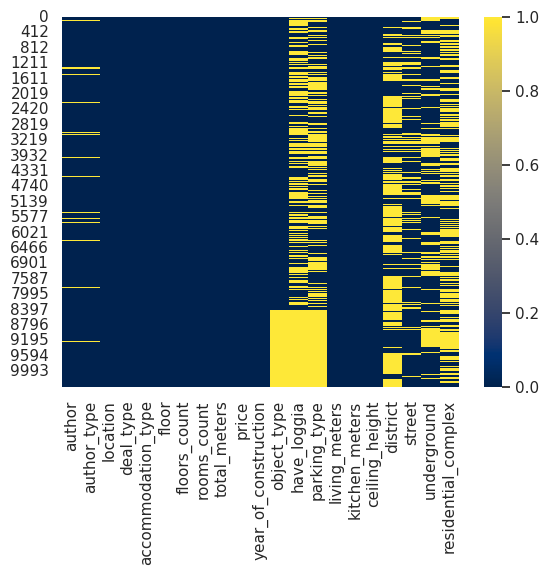

In [136]:
sns.heatmap(df.isnull(), cmap='cividis')

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
district,5799
parking_type,5332
have_loggia,5241
residential_complex,4953
underground,2926
object_type,1999
street,1704
author,329
author_type,320
accommodation_type,1


In [ ]:
df.head()

,author,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,...,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,ID 115709096,homeowner,Серпухов,sale,flat,6.0,6.0,1.0,20.7,2350000.0,...,Вторичка,NaN,Наземная,18.0,1.0,3.00,Серпухов,Крюкова,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,Серпухов,sale,flat,1.0,9.0,1.0,33.0,4150000.0,...,Вторичка,NaN,NaN,18.0,6.0,2.70,NaN,Ворошилова,Аннино,NaN
2,ID 3246838,realtor,Серпухов,sale,flat,4.0,4.0,1.0,14.0,1700000.0,...,Вторичка,NaN,NaN,25.0,9.5,2.75,Красный Текстильщик мкр,Красный Текстильщик,NaN,NaN
3,ID 64398571,unknown,Серпухов,sale,flat,5.0,5.0,1.0,17.5,2500000.0,...,Вторичка,NaN,NaN,25.0,9.5,2.75,Серпухов,Российская,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,Серпухов,sale,flat,4.0,7.0,1.0,25.9,3000000.0,...,Вторичка,NaN,Наземная,20.0,5.0,3.50,Серпухов,Химиков,NaN,NaN


Осталось только заполнить все другие категориальные колонки

In [137]:
cat_columns = ['object_type', 'have_loggia', 'parking_type', 'district',
       'street', 'underground', 'residential_complex', 'author',
               'author_type',	'accommodation_type',	'deal_type', 'location']


for column in cat_columns:
     df[column] = df[column].apply(lambda x: 'unknown' if pd.isna(x) else x)

<Axes: >

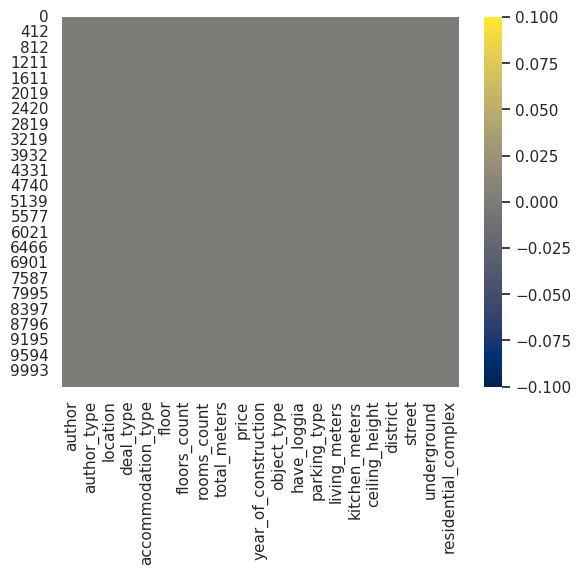

In [138]:
sns.heatmap(df.isnull(), cmap='cividis')

In [139]:
df.head(5)

,author,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,...,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,ID 115709096,homeowner,Серпухов,sale,flat,6.0,6.0,1.0,20.7,2350000.0,...,Вторичка,unknown,Наземная,18.0,1.0,3.00,Серпухов,Крюкова,unknown,unknown
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,Серпухов,sale,flat,1.0,9.0,1.0,33.0,4150000.0,...,Вторичка,unknown,unknown,18.0,6.0,2.70,unknown,Ворошилова,Аннино,unknown
2,ID 3246838,realtor,Серпухов,sale,flat,4.0,4.0,1.0,14.0,1700000.0,...,Вторичка,unknown,unknown,25.0,9.5,2.75,Красный Текстильщик мкр,Красный Текстильщик,unknown,unknown
3,ID 64398571,unknown,Серпухов,sale,flat,5.0,5.0,1.0,17.5,2500000.0,...,Вторичка,unknown,unknown,25.0,9.5,2.75,Серпухов,Российская,unknown,unknown
4,ЛИДЕРМЭЙН,real_estate_agent,Серпухов,sale,flat,4.0,7.0,1.0,25.9,3000000.0,...,Вторичка,unknown,Наземная,20.0,5.0,3.50,Серпухов,Химиков,unknown,unknown


Теперь с уверенностью можно сказать что в датасете нет пропусков

In [140]:
df.isnull().sum().sort_values(ascending=False)

,0
author,0
object_type,0
underground,0
street,0
district,0
ceiling_height,0
kitchen_meters,0
living_meters,0
parking_type,0
have_loggia,0


In [ ]:
df.columns

Index(['author', 'author_type', 'location', 'deal_type', 'accommodation_type',
       'floor', 'floors_count', 'rooms_count', 'total_meters', 'price',
       'year_of_construction', 'object_type', 'have_loggia', 'parking_type',
       'living_meters', 'kitchen_meters', 'ceiling_height', 'district',
       'street', 'underground', 'residential_complex'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9575 entries, 0 to 10390
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                9575 non-null   object 
 1   author_type           9575 non-null   object 
 2   location              9575 non-null   object 
 3   deal_type             9575 non-null   object 
 4   accommodation_type    9575 non-null   object 
 5   floor                 9575 non-null   float64
 6   floors_count          9575 non-null   float64
 7   rooms_count           9575 non-null   float64
 8   total_meters          9575 non-null   float64
 9   price                 9575 non-null   float64
 10  year_of_construction  9575 non-null   float64
 11  object_type           9575 non-null   object 
 12  have_loggia           9575 non-null   object 
 13  parking_type          9575 non-null   object 
 14  living_meters         9575 non-null   float64
 15  kitchen_meters        957

Теперь можно привести некоторые колонки из float в int так как это должно быть целое число

In [141]:
to_int_columns = ['floor', 'floors_count', 'rooms_count', 'year_of_construction']


for columni in to_int_columns:
  df[columni] = df[columni].astype(int)

In [142]:
df.dtypes

,0
author,object
author_type,object
location,object
deal_type,object
accommodation_type,object
floor,int64
floors_count,int64
rooms_count,int64
total_meters,float64
price,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9575 entries, 0 to 10390
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                9575 non-null   object 
 1   author_type           9575 non-null   object 
 2   location              9575 non-null   object 
 3   deal_type             9575 non-null   object 
 4   accommodation_type    9575 non-null   object 
 5   floor                 9575 non-null   int64  
 6   floors_count          9575 non-null   int64  
 7   rooms_count           9575 non-null   int64  
 8   total_meters          9575 non-null   float64
 9   price                 9575 non-null   float64
 10  year_of_construction  9575 non-null   int64  
 11  object_type           9575 non-null   object 
 12  have_loggia           9575 non-null   object 
 13  parking_type          9575 non-null   object 
 14  living_meters         9575 non-null   float64
 15  kitchen_meters        957

In [ ]:
df.head(50)

,author,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,...,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,ID 115709096,homeowner,Серпухов,sale,flat,6,6,1,20.70,2350000.0,...,Вторичка,unknown,Наземная,18.0,1.0,3.00,Серпухов,Крюкова,unknown,unknown
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,Серпухов,sale,flat,1,9,1,33.00,4150000.0,...,Вторичка,unknown,unknown,18.0,6.0,2.70,unknown,Ворошилова,Аннино,unknown
2,ID 3246838,realtor,Серпухов,sale,flat,4,4,1,14.00,1700000.0,...,Вторичка,unknown,unknown,25.0,9.5,2.75,Красный Текстильщик мкр,Красный Текстильщик,unknown,unknown
3,ID 64398571,unknown,Серпухов,sale,flat,5,5,1,17.50,2500000.0,...,Вторичка,unknown,unknown,25.0,9.5,2.75,Серпухов,Российская,unknown,unknown
4,ЛИДЕРМЭЙН,real_estate_agent,Серпухов,sale,flat,4,7,1,25.90,3000000.0,...,Вторичка,unknown,Наземная,20.0,5.0,3.50,Серпухов,Химиков,unknown,unknown
5,Максим Юсов,real_estate_agent,Серпухов,sale,flat,2,3,1,46.70,6599999.0,...,Вторичка,unknown,unknown,25.0,6.0,2.75,Серпухов,2-я Московская,unknown,unknown
6,ID 9655060,unknown,Серпухов,sale,flat,3,5,1,29.00,3350000.0,...,Вторичка,unknown,Наземная,25.0,9.5,3.00,Серпухов,Форсса,unknown,unknown
7,Этажи Серпухов,real_estate_agent,Серпухов,sale,flat,3,6,1,19.10,3600000.0,...,Вторичка,unknown,unknown,25.0,9.5,2.75,Серпухов,Крюкова,unknown,unknown
8,Ольга Протченко,realtor,Серпухов,sale,flat,1,2,1,27.10,1900000.0,...,Вторичка,unknown,Наземная,18.0,6.0,2.50,unknown,unknown,unknown,unknown
9,Глеб Маслов,realtor,Серпухов,sale,flat,6,9,2,42.70,3990000.0,...,Вторичка,1 лоджия,Наземная,29.7,5.6,2.70,Серпухов,Весенняя,unknown,unknown


# Проверка на выбросы

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9575 entries, 0 to 10390
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                9575 non-null   object 
 1   author_type           9575 non-null   object 
 2   location              9575 non-null   object 
 3   deal_type             9575 non-null   object 
 4   accommodation_type    9575 non-null   object 
 5   floor                 9575 non-null   int64  
 6   floors_count          9575 non-null   int64  
 7   rooms_count           9575 non-null   int64  
 8   total_meters          9575 non-null   float64
 9   price                 9575 non-null   float64
 10  year_of_construction  9575 non-null   int64  
 11  object_type           9575 non-null   object 
 12  have_loggia           9575 non-null   object 
 13  parking_type          9575 non-null   object 
 14  living_meters         9575 non-null   float64
 15  kitchen_meters        957

In [ ]:
df.columns

Index(['author', 'author_type', 'location', 'deal_type', 'accommodation_type',
       'floor', 'floors_count', 'rooms_count', 'total_meters', 'price',
       'year_of_construction', 'object_type', 'have_loggia', 'parking_type',
       'living_meters', 'kitchen_meters', 'ceiling_height', 'district',
       'street', 'underground', 'residential_complex'],
      dtype='object')

In [143]:
possible_outliers = df[[ 'floor', 'floors_count',
                     'rooms_count', 'total_meters', 'price',
                    'year_of_construction', 'living_meters',
                    'kitchen_meters', 'ceiling_height']]



possible_outliers

,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,ceiling_height
0,6,6,1,20.7,2350000.0,1917,18.0,1.0,3.00
1,1,9,1,33.0,4150000.0,1975,18.0,6.0,2.70
2,4,4,1,14.0,1700000.0,2016,25.0,9.5,2.75
3,5,5,1,17.5,2500000.0,1968,25.0,9.5,2.75
4,4,7,1,25.9,3000000.0,2009,20.0,5.0,3.50
...,...,...,...,...,...,...,...,...,...
10386,23,24,1,38.5,9363008.0,2016,25.0,9.5,2.75
10387,1,3,2,43.3,5750000.0,2016,25.0,9.5,2.75
10388,8,8,2,60.0,9200000.0,2016,25.0,9.5,2.75
10389,3,19,2,58.0,8200000.0,2016,25.0,9.5,2.75


In [144]:
outlier_cols = []

for column in possible_outliers.columns:
    # Calculate the IQR (Interquartile Range)
    Q1 = possible_outliers[column].quantile(0.25)
    Q3 = possible_outliers[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers based on the IQR
    outliers = (possible_outliers[column] < Q1 - 1.5 * IQR) | (possible_outliers[column] > Q3 + 1.5 * IQR)

    # Check if there are any outliers in the column
    if any(outliers):
        outlier_cols.append(column)

# Print columns with outliers
print("Колонки с выбросами:", outlier_cols)

Колонки с выбросами: ['floor', 'floors_count', 'rooms_count', 'total_meters', 'price', 'year_of_construction', 'living_meters', 'kitchen_meters', 'ceiling_height']


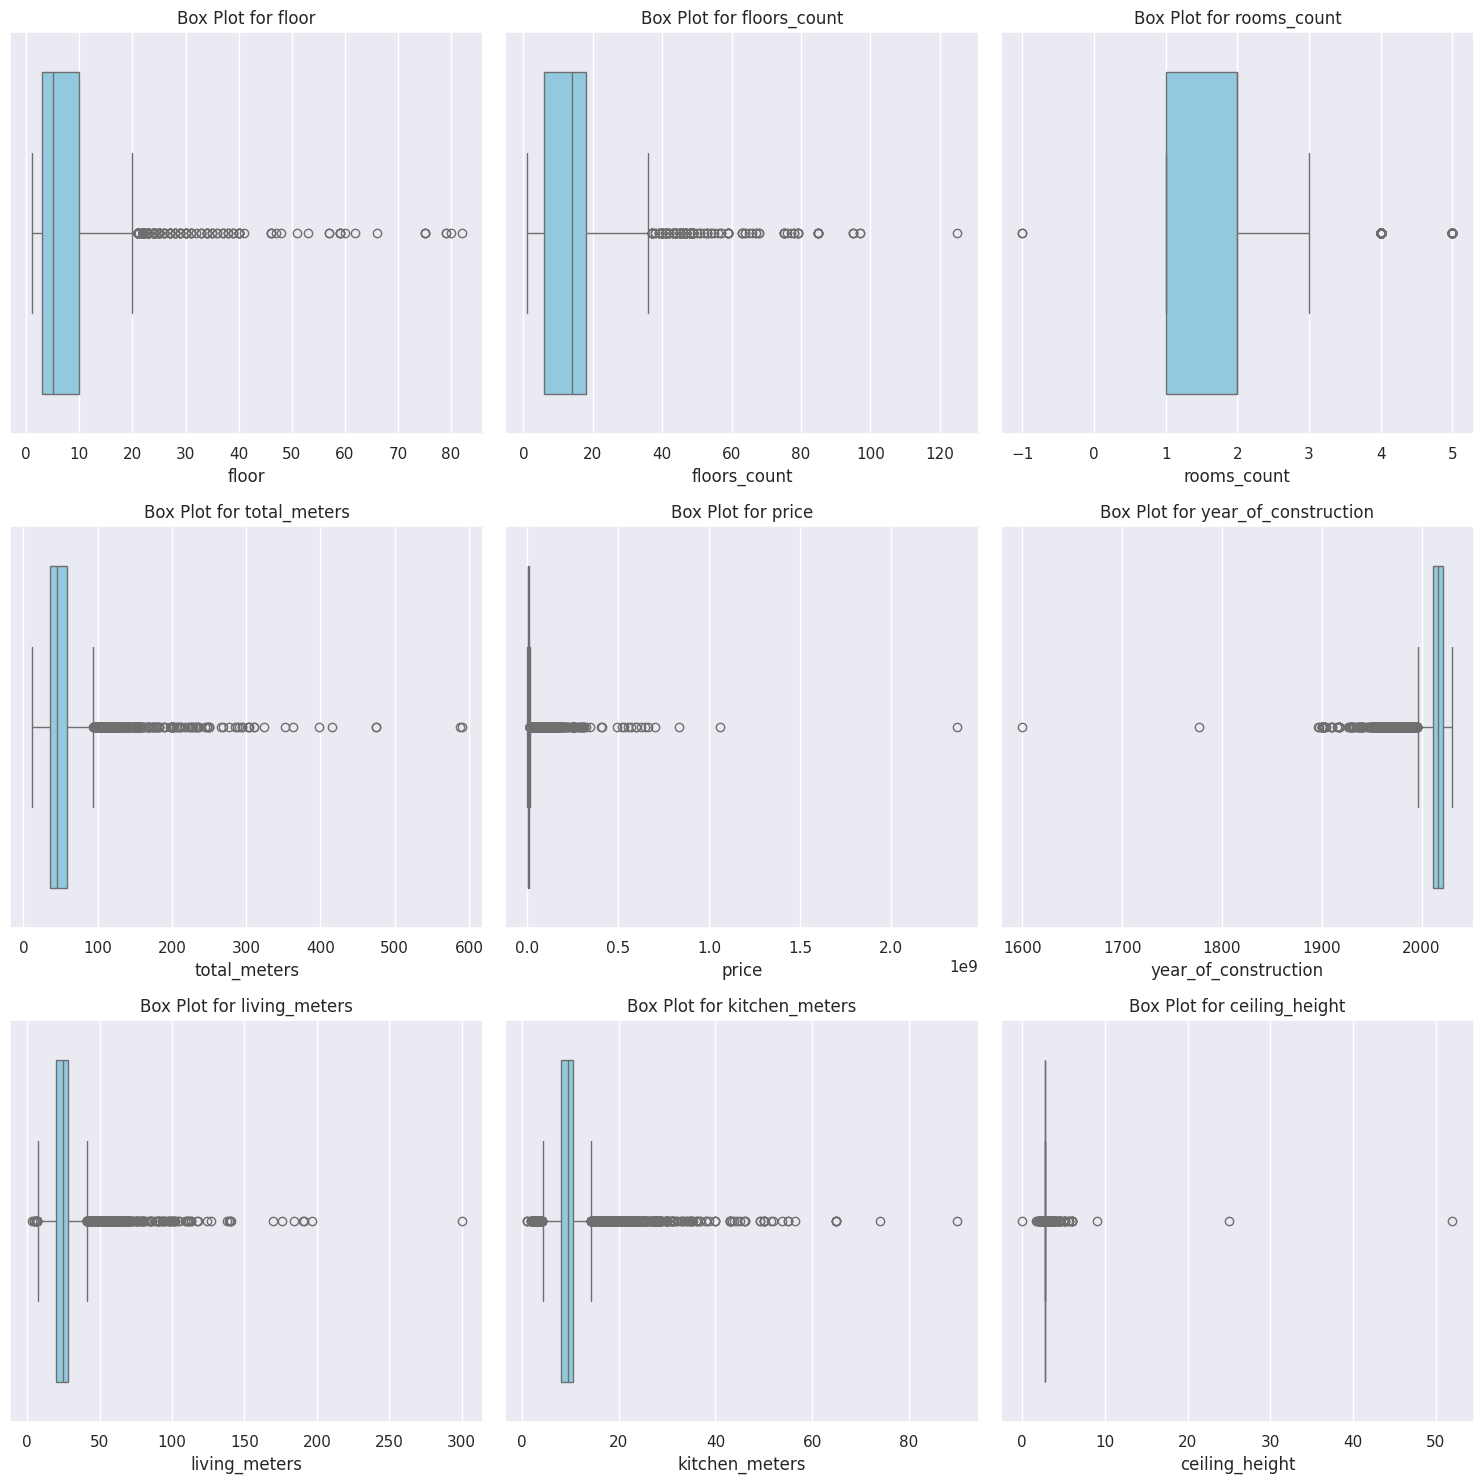

In [145]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Создание box plots для каждого столбца
for i, column in enumerate(possible_outliers.columns):
    row = i // 3
    col = i % 3
    sns.boxplot(x=possible_outliers[column], ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(f'Box Plot for {column}')


plt.subplots_adjust(hspace=0.9)
plt.tight_layout()
plt.show()

In [146]:
from scipy import stats


def detect_outliers_zscore(df, column, threshold=3):
    z_scores = stats.zscore(possible_outliers[column])
    abs_z_scores = abs(z_scores)
    outliers = df[abs_z_scores > threshold]
    return outliers

# Определение выбросов для каждого столбца
for column in possible_outliers.columns:
    outliers = detect_outliers_zscore(possible_outliers, column)
    print(f"Выбросы в столбце {column}:")
    print(outliers)
    print()

Выбросы в столбце floor:
       floor  floors_count  rooms_count  total_meters        price  \
110       35            41            3         97.40   95000000.0   
155       37            85            3        187.50  150562821.0   
165       28            32            3        110.00   61990000.0   
167       34            57            3        177.00  150000000.0   
196       40            49            2         61.89   28159950.0   
...      ...           ...          ...           ...          ...   
10062     38            78            1         58.00   58500000.0   
10110     39            41            2         56.90   39000000.0   
10122     39            41            2         56.90   40000000.0   
10137     37            37            2         48.00   42500000.0   
10158     59            85            2         90.30   75000000.0   

       year_of_construction  living_meters  kitchen_meters  ceiling_height  
110                    2016           69.0             7.

In [147]:
def detect_outliers_iqr(possible_outliers, column):
    Q1 = possible_outliers[column].quantile(0.25)
    Q3 = possible_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = possible_outliers[(possible_outliers[column] < lower_bound) | (possible_outliers[column] > upper_bound)]
    return outliers

# Функция для определения выбросов с использованием z-оценки
def detect_outliers_zscore(possible_outliers, column, threshold=3):
    z_scores = stats.zscore(possible_outliers[column])
    abs_z_scores = abs(z_scores)
    outliers = possible_outliers[abs_z_scores > threshold]
    return outliers

# Функция для замены выбросов на медиану
def replace_outliers_with_median(possible_outliers, column):
    Q1 = possible_outliers[column].quantile(0.25)
    Q3 = possible_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = possible_outliers[column].median()
    possible_outliers.loc[(possible_outliers[column] < lower_bound) | (possible_outliers[column] > upper_bound), column] = median

# Функция для замены выбросов на моду
def replace_outliers_with_mode(possible_outliers, column):
    Q1 = possible_outliers[column].quantile(0.25)
    Q3 = possible_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mode = possible_outliers[column].mode()[0]
    possible_outliers.loc[(possible_outliers[column] < lower_bound) | (possible_outliers[column] > upper_bound), column] = mode

# Список количественных переменных
quantitative_columns = ['total_meters', 'price', 'living_meters', 'kitchen_meters', 'ceiling_height']

# Список категориальных переменных
categorical_columns = ['floor', 'floors_count', 'rooms_count', 'year_of_construction']

# Определение выбросов и вывод их
outliers_dict = {}
for column in possible_outliers.columns:
    if column in quantitative_columns:
        outliers = detect_outliers_iqr(possible_outliers, column)
    else:
        outliers = detect_outliers_zscore(possible_outliers, column)
    outliers_dict[column] = outliers
    print(f"Выбросы в столбце {column}:")
    print(outliers)
    print()

# Сглаживание выбросов
for column in quantitative_columns:
    replace_outliers_with_median(possible_outliers, column)

for column in categorical_columns:
    replace_outliers_with_mode(possible_outliers, column)

# Вывод обработанных данных
print("Обработанные данные:")
print(possible_outliers)

Выбросы в столбце floor:
       floor  floors_count  rooms_count  total_meters        price  \
110       35            41            3         97.40   95000000.0   
155       37            85            3        187.50  150562821.0   
165       28            32            3        110.00   61990000.0   
167       34            57            3        177.00  150000000.0   
196       40            49            2         61.89   28159950.0   
...      ...           ...          ...           ...          ...   
10062     38            78            1         58.00   58500000.0   
10110     39            41            2         56.90   39000000.0   
10122     39            41            2         56.90   40000000.0   
10137     37            37            2         48.00   42500000.0   
10158     59            85            2         90.30   75000000.0   

       year_of_construction  living_meters  kitchen_meters  ceiling_height  
110                    2016           69.0             7.

In [197]:
possible_outliers

,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,ceiling_height
0,6,6,1,20.7,2350000.0,2016,18.0,9.5,2.75
1,1,9,1,33.0,4150000.0,2016,18.0,6.0,2.75
2,4,4,1,14.0,1700000.0,2016,25.0,9.5,2.75
3,5,5,1,17.5,2500000.0,2016,25.0,9.5,2.75
4,4,7,1,25.9,3000000.0,2009,20.0,5.0,2.75
...,...,...,...,...,...,...,...,...,...
10386,2,24,1,38.5,9363008.0,2016,25.0,9.5,2.75
10387,1,3,2,43.3,5750000.0,2016,25.0,9.5,2.75
10388,8,8,2,60.0,9200000.0,2016,25.0,9.5,2.75
10389,3,19,2,58.0,8200000.0,2016,25.0,9.5,2.75


Их стало меньше 😊

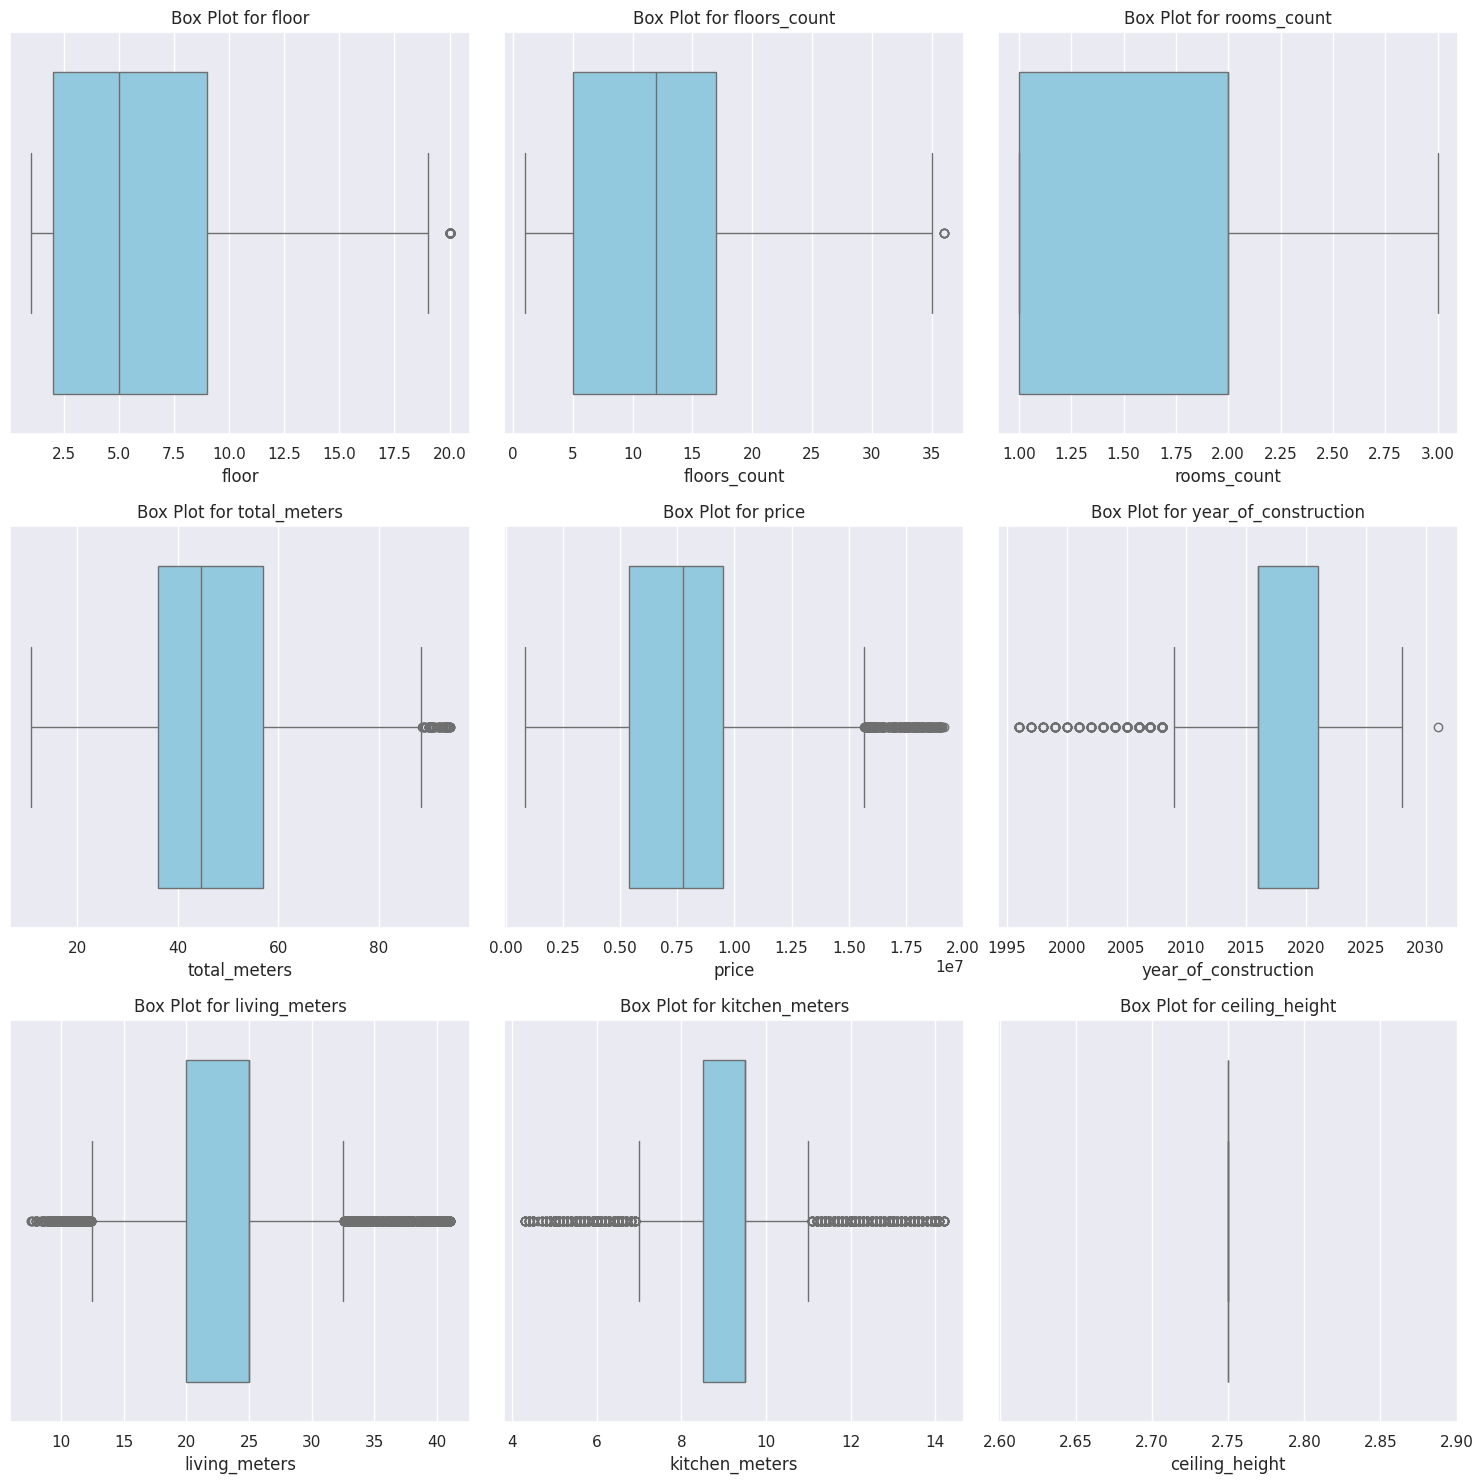

In [148]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Создание box plots для каждого столбца
for i, column in enumerate(possible_outliers.columns):
    row = i // 3
    col = i % 3
    sns.boxplot(x=possible_outliers[column], ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(f'Box Plot for {column}')


plt.subplots_adjust(hspace=0.9)
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['floor', 'floors_count', 'rooms_count', 'total_meters', 'price',
       'year_of_construction', 'living_meters', 'kitchen_meters',
       'ceiling_height'],
      dtype='object')

In [149]:
df.describe()

,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,ceiling_height
count,9575.000000,9575.000000,9575.000000,9575.000000,9.575000e+03,9575.000000,9575.000000,9575.000000,9575.000000
mean,7.325013,13.888773,1.696397,50.774564,1.361407e+07,2009.579843,26.495728,10.183070,2.790030
std,6.501278,9.094154,0.780777,27.471916,4.157139e+07,19.883924,12.310375,4.776078,0.593376
min,1.000000,1.000000,-1.000000,10.800000,8.300000e+05,1600.000000,3.000000,1.000000,0.000000
25%,3.000000,6.000000,1.000000,36.000000,5.400000e+06,2011.000000,20.000000,8.000000,2.750000
50%,5.000000,14.000000,2.000000,44.700000,7.750000e+06,2016.000000,25.000000,9.500000,2.750000
75%,10.000000,18.000000,2.000000,59.200000,1.090000e+07,2021.000000,28.400000,10.500000,2.750000
max,82.000000,125.000000,5.000000,590.300000,2.361200e+09,2031.000000,300.000000,90.000000,52.000000


Одним из подозрительных значений является количество этажей, равное 125.

Но конечно такое возможно в мире, и эти данные могут быть из Москвы.

И то, что возможно, не видно на графиках как выброс это 50 м высота полока.


После того как частично были убраны выбросы, можно посчитать цену за квадратный метр

In [150]:
df['square_price'] = df['price']/df['total_meters']
df.head()

,author,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,...,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex,square_price
0,ID 115709096,homeowner,Серпухов,sale,flat,6,6,1,20.7,2350000.0,...,unknown,Наземная,18.0,1.0,3.00,Серпухов,Крюкова,unknown,unknown,113526.570048
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,Серпухов,sale,flat,1,9,1,33.0,4150000.0,...,unknown,unknown,18.0,6.0,2.70,unknown,Ворошилова,Аннино,unknown,125757.575758
2,ID 3246838,realtor,Серпухов,sale,flat,4,4,1,14.0,1700000.0,...,unknown,unknown,25.0,9.5,2.75,Красный Текстильщик мкр,Красный Текстильщик,unknown,unknown,121428.571429
3,ID 64398571,unknown,Серпухов,sale,flat,5,5,1,17.5,2500000.0,...,unknown,unknown,25.0,9.5,2.75,Серпухов,Российская,unknown,unknown,142857.142857
4,ЛИДЕРМЭЙН,real_estate_agent,Серпухов,sale,flat,4,7,1,25.9,3000000.0,...,unknown,Наземная,20.0,5.0,3.50,Серпухов,Химиков,unknown,unknown,115830.115830


In [ ]:
df.columns

Index(['author', 'author_type', 'location', 'deal_type', 'accommodation_type',
       'floor', 'floors_count', 'rooms_count', 'total_meters', 'price',
       'year_of_construction', 'object_type', 'have_loggia', 'parking_type',
       'living_meters', 'kitchen_meters', 'ceiling_height', 'district',
       'street', 'underground', 'residential_complex', 'square_price'],
      dtype='object')

# Визуализация

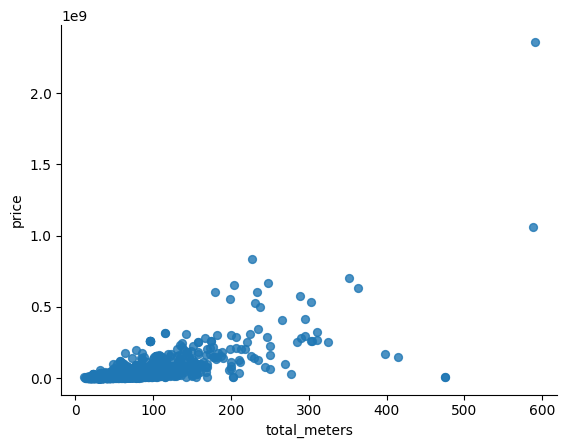

In [ ]:
# @title total_meters vs price

from matplotlib import pyplot as plt
possible_outliers.plot(kind='scatter', x='total_meters', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Здесь можно заметить, что дороже всего Новостройка / Пентхаус, а Вторички стоят дешевле всего

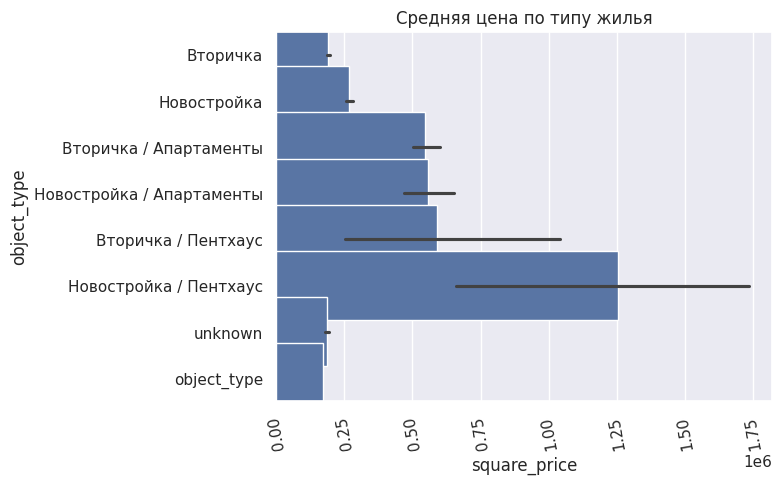

In [ ]:
sns.barplot(x='square_price', y='object_type', data=df, width=1.5)  # Увеличиваем ширину столбцов до 120%
plt.title('Средняя цена по типу жилья')
plt.xticks(rotation=100)  # Поворот подписей по оси X для лучшей читаемости
plt.show()

Выбираем промежуток от 1990 до 2024

In [ ]:
df = df[(df["year_of_construction"] >= 1990) & (df["year_of_construction"] <= 2024)]

In [ ]:
average_prices = df.groupby('year_of_construction')['square_price'].mean().reset_index()
average_prices

,year_of_construction,square_price
0,1990,170812.726497
1,1991,148960.318219
2,1992,152699.146919
3,1993,159935.557969
4,1994,166093.452140
5,1995,158686.669289
6,1996,175398.227363
7,1997,166334.383012
8,1998,222797.980119
9,1999,197353.764013


Это график который показывает сколько и в какой год стоил 1 квадратный метр

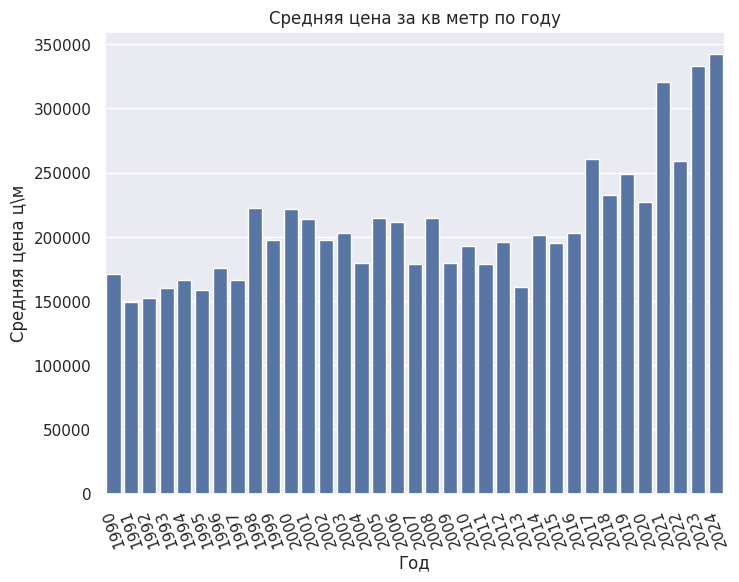

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='year_of_construction', y='square_price', data=average_prices)
plt.title('Средняя цена за кв метр по году')
plt.xlabel('Год')
plt.ylabel('Средняя цена ц\м')
plt.xticks(rotation=110)

plt.show()

In [ ]:
df['year_of_construction'].sort_values(ascending=False)

,year_of_construction
6863,2031
757,2028
2034,2028
738,2028
1632,2028
...,...
243,1991
4231,1991
646,1991
5137,1991


In [ ]:
average_prices = df.groupby('year_of_construction')['square_price'].mean().reset_index()
average_prices

,year_of_construction,square_price
0,1990,170812.726497
1,1991,148960.318219
2,1992,152699.146919
3,1993,159935.557969
4,1994,166093.452140
5,1995,158686.669289
6,1996,175398.227363
7,1997,166334.383012
8,1998,222797.980119
9,1999,197353.764013


In [ ]:
df.describe()

,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,ceiling_height
count,6695.000000,6695.000000,6695.000000,6695.000000,6.695000e+03,6695.000000,6695.000000,6695.000000,6695.000000
mean,7.693652,14.394922,1.684690,52.773041,1.461356e+07,2015.660194,27.085810,10.685273,2.790580
std,6.661125,9.053536,0.756545,28.313304,3.827699e+07,5.825722,12.861501,4.887987,0.340753
min,1.000000,1.000000,-1.000000,12.000000,8.300000e+05,1990.000000,3.000000,1.000000,1.650000
25%,3.000000,8.000000,1.000000,37.800000,5.600000e+06,2016.000000,22.400000,9.500000,2.750000
50%,6.000000,15.000000,2.000000,46.100000,8.000000e+06,2016.000000,25.000000,9.500000,2.750000
75%,11.000000,18.000000,2.000000,61.000000,1.128000e+07,2017.000000,27.900000,11.000000,2.750000
max,82.000000,125.000000,5.000000,588.100000,1.058580e+09,2024.000000,300.000000,90.000000,25.000000


Максимальная и Минимальная цена

In [151]:
min_year = average_prices.loc[average_prices['square_price'].idxmin(), 'year_of_construction']
max_year = average_prices.loc[average_prices['square_price'].idxmax(), 'year_of_construction']

min_price = average_prices['square_price'].min()
max_price = average_prices['square_price'].max()

print(f"Минимальная цена: {min_price} в: {min_year}")
print(f"Максимальная цена: {max_price} в: {max_year}")

Минимальная цена: 148960.3182192496 в: 1991
Максимальная цена: 342664.85583735694 в: 2024


In [ ]:
df.head()

,author,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,...,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
2,ID 3246838,realtor,Серпухов,sale,flat,4,4,1,14.0,1700000.0,...,Вторичка,unknown,unknown,25.0,9.5,2.75,Красный Текстильщик мкр,Красный Текстильщик,unknown,unknown
4,ЛИДЕРМЭЙН,real_estate_agent,Серпухов,sale,flat,4,7,1,25.9,3000000.0,...,Вторичка,unknown,Наземная,20.0,5.0,3.50,Серпухов,Химиков,unknown,unknown
5,Максим Юсов,real_estate_agent,Серпухов,sale,flat,2,3,1,46.7,6599999.0,...,Вторичка,unknown,unknown,25.0,6.0,2.75,Серпухов,2-я Московская,unknown,unknown
10,Людмила Горбачева,realtor,Серпухов,sale,flat,1,5,2,42.8,2999000.0,...,Вторичка,1 балкон,Наземная,24.9,6.0,2.50,пос. Чехов-8,Южная,unknown,unknown
13,Монолит Столица,real_estate_agent,Серпухов,sale,flat,1,3,1,25.3,2500000.0,...,Вторичка,1 лоджия,unknown,14.1,6.2,2.80,д. Ворщиково,Солнечный Град,unknown,unknown


In [ ]:
parking = df.groupby('parking_type')['square_price'].mean().reset_index()
parking

,parking_type,square_price
0,parking_type,173378.076063
1,unknown,205857.304061
2,Многоуровневая,308314.614392
3,Наземная,176493.832375
4,Открытая,211720.969194
5,Подземная,508983.706095


По этому графику можно увидеть, что дороже всего подземная парковка

<ipython-input-49-f563f7ac96b1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=parking, x='square_price', y='parking_type', palette='Dark2', estimator=np.mean)


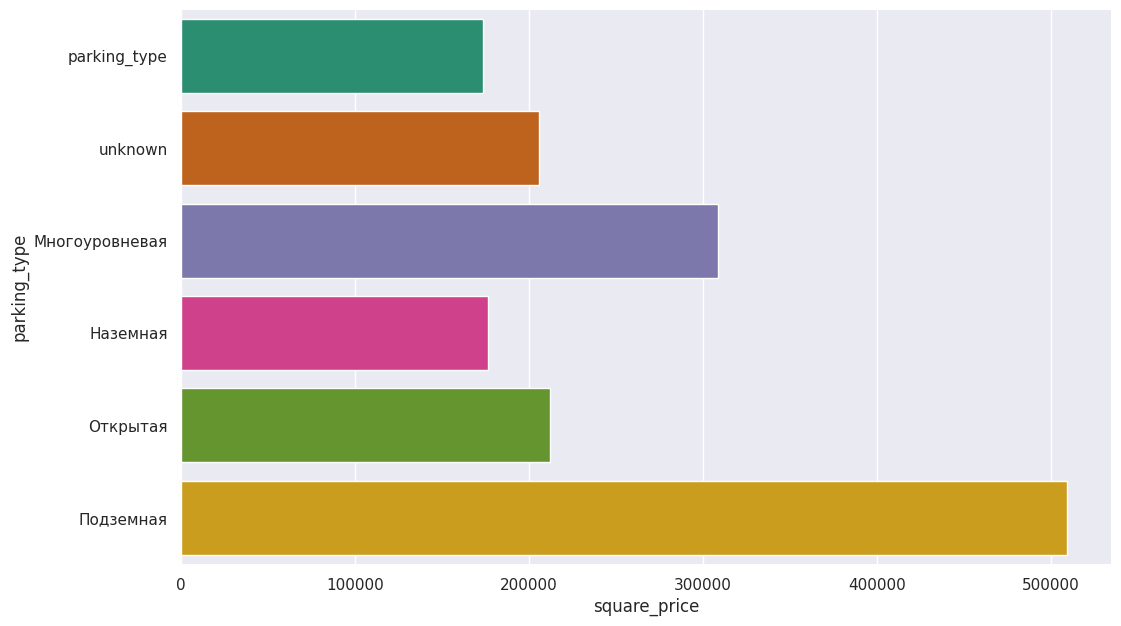

In [ ]:
figsize = (12, 1.2 * len(parking['parking_type'].unique()))
plt.figure(figsize=figsize)

# Создание barplot
sns.barplot(data=parking, x='square_price', y='parking_type', palette='Dark2', estimator=np.mean)

# Удаление лишних осей
sns.despine(top=True, right=True, bottom=True, left=True)

# Вывод графика
plt.show()

In [ ]:
logia = df.groupby('have_loggia')['square_price'].mean().reset_index()
logia

,have_loggia,square_price
0,1 балкон,187821.786492
1,1 лоджия,178038.914624
2,"1 лоджия, 1 балкон",188155.833325
3,"1 лоджия, 2 балкона",240594.890229
4,2 балкона,277216.014645
5,2 лоджии,180104.062242
6,"2 лоджии, 1 балкон",195778.806601
7,"2 лоджии, 2 балкона",284786.290426
8,3 балкона,425281.160007
9,3 лоджии,182024.754104


Как влияет на цену за кв.м наличие балконов или лоджии

<ipython-input-102-f05a8f42de64>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=logia, x='square_price', y='have_loggia', palette='Dark2', estimator=np.mean)


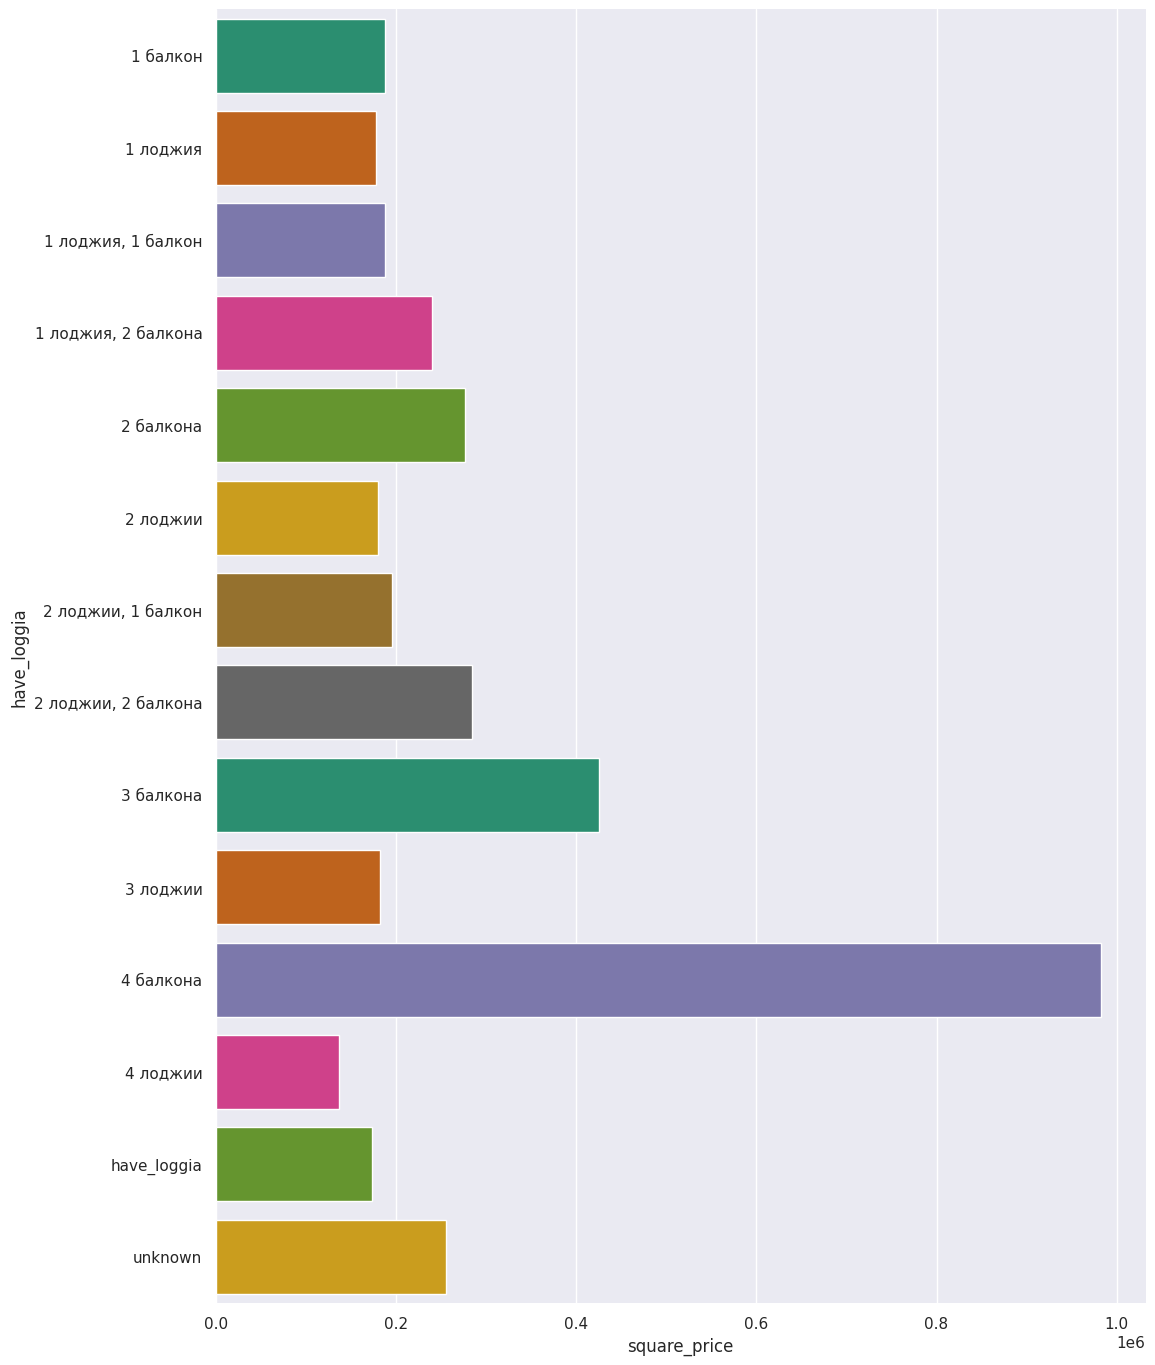

In [ ]:
figsize = (12, 1.2 * len(logia['have_loggia'].unique()))
plt.figure(figsize=figsize)

# Создание barplot
sns.barplot(data=logia, x='square_price', y='have_loggia', palette='Dark2', estimator=np.mean)

# Удаление лишних осей
sns.despine(top=True, right=True, bottom=True, left=True)

# Вывод графика
plt.show()

In [ ]:
df = df[(df["year_of_construction"] >= 1990) & (df["year_of_construction"] <= 2024)]

In [ ]:
ch = df.groupby('ceiling_height')['square_price'].mean().reset_index()
ch

,ceiling_height,square_price
0,1.65,153532.608696
1,2.00,193592.557527
2,2.26,134900.990099
3,2.30,149606.299213
4,2.40,148069.419238
...,...,...
76,5.50,162765.957447
77,5.70,578830.763122
78,6.00,182443.219380
79,9.00,111204.081633


In [ ]:
locations = df.groupby('location')['square_price'].mean().reset_index()
locations

,location,square_price
0,location,173378.076063
1,unknown,173378.076063
2,Балашиха,166068.342657
3,Бекасово,368883.639082
4,Видное,183091.536309
5,Волоколамск,113137.312350
6,Воскресенск,98497.887312
7,Дзержинский,165378.438737
8,Дмитров,121703.209628
9,Долгопрудный,204954.944353


Цена за 1 квадратный метр в зависимости от города

<ipython-input-51-71c7de05a253>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=locations, x='square_price', y='location', palette='Dark2', estimator=np.mean)


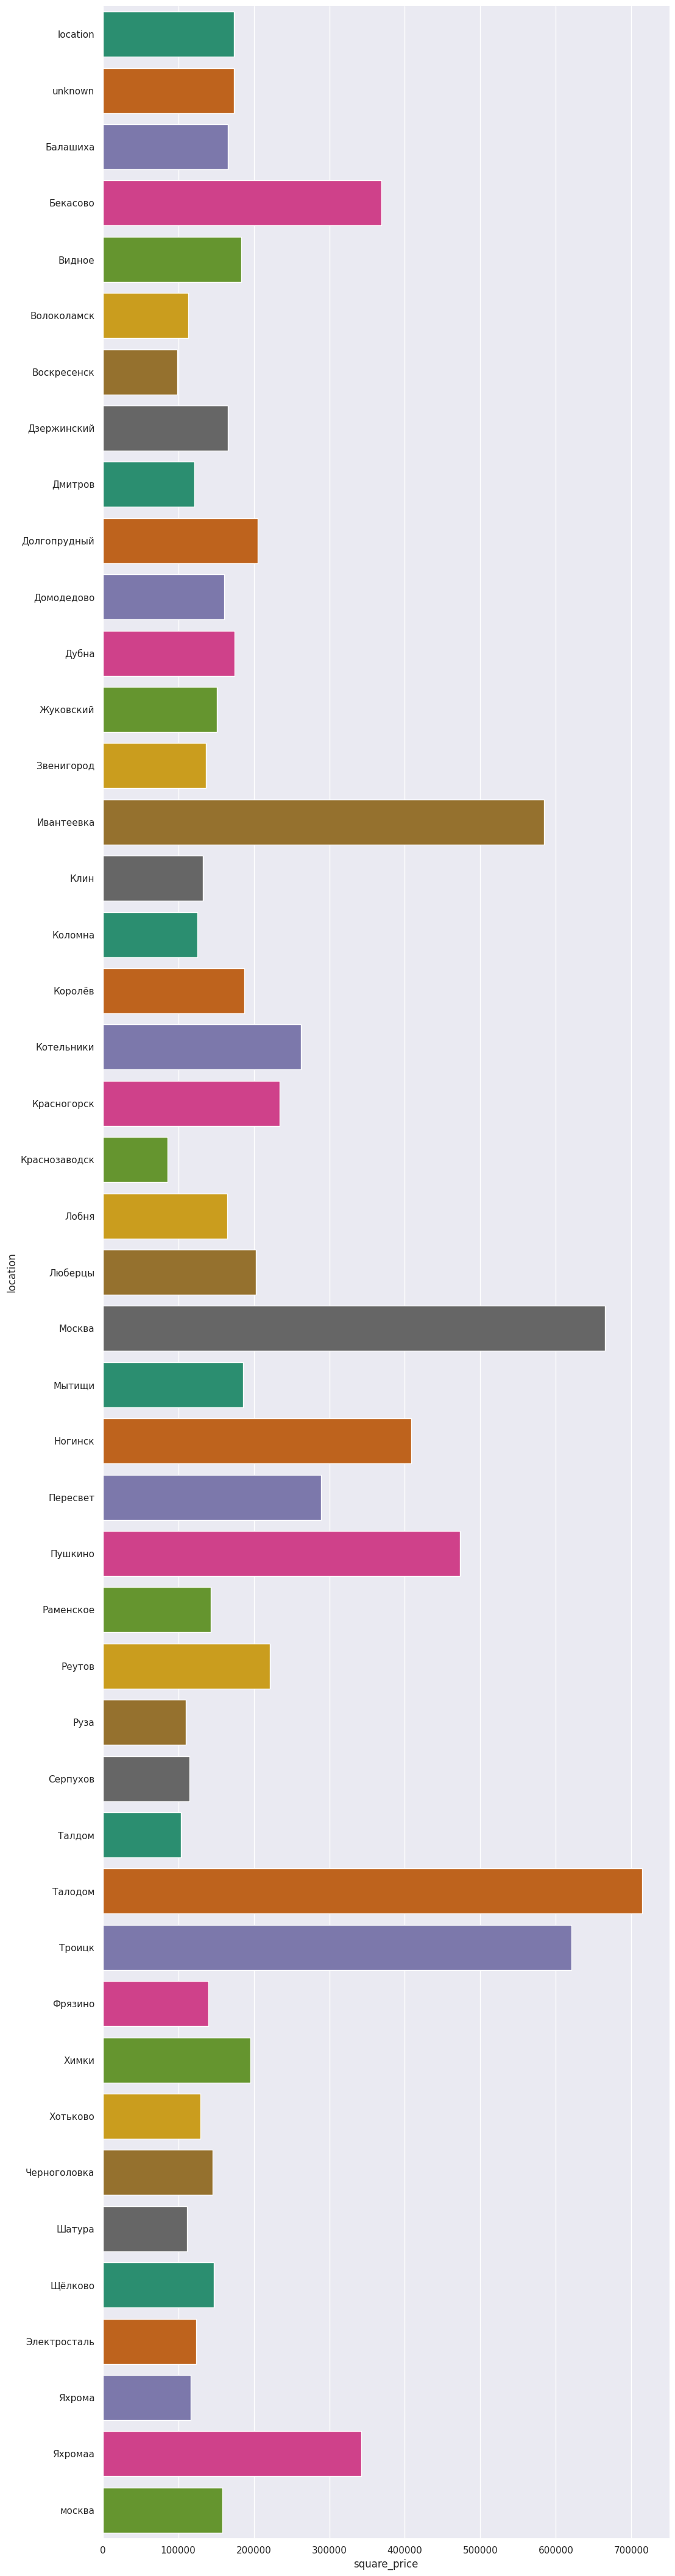

In [ ]:
figsize = (12, 1.2 * len(locations['location'].unique()))
plt.figure(figsize=figsize)

# Создание barplot
sns.barplot(data=locations, x='square_price', y='location', palette='Dark2', estimator=np.mean)

# Удаление лишних осей
sns.despine(top=True, right=True, bottom=True, left=True)

# Вывод графика
plt.show()

**Топ 10 городов по стоимости**




<ipython-input-194-ed9461c10eb1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_locations, x='square_price', y='location', palette='Dark2', estimator=np.mean)


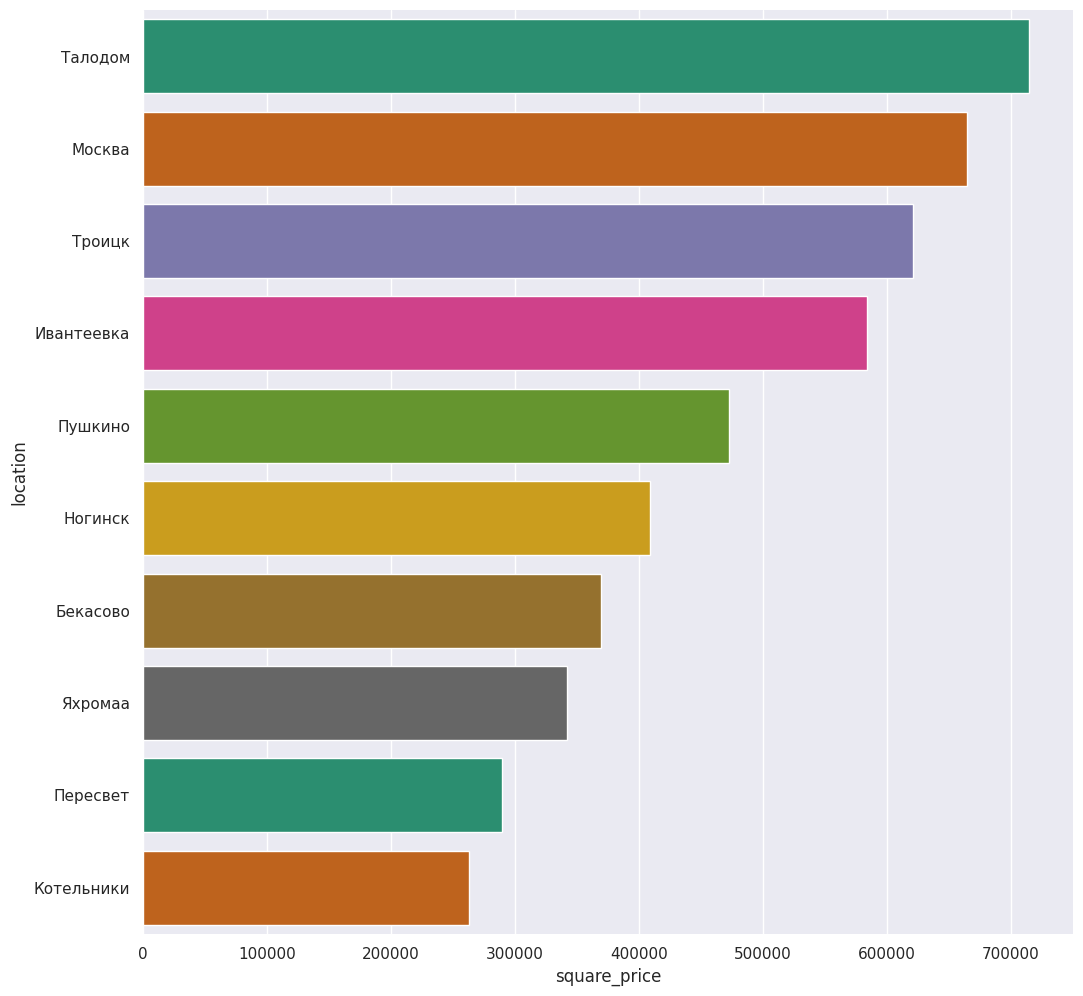

In [194]:

top_10_locations = locations.sort_values(by='square_price', ascending=False).head(10)

# Устанавливаем размер фигуры
figsize = (12, 1.2 * len(top_10_locations))
plt.figure(figsize=figsize)

# Создание barplot для топ 10 городов
sns.barplot(data=top_10_locations, x='square_price', y='location', palette='Dark2', estimator=np.mean)

# Удаление лишних осей
sns.despine(top=True, right=True, bottom=True, left=True)

# Вывод графика

<ipython-input-195-71c7de05a253>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=locations, x='square_price', y='location', palette='Dark2', estimator=np.mean)


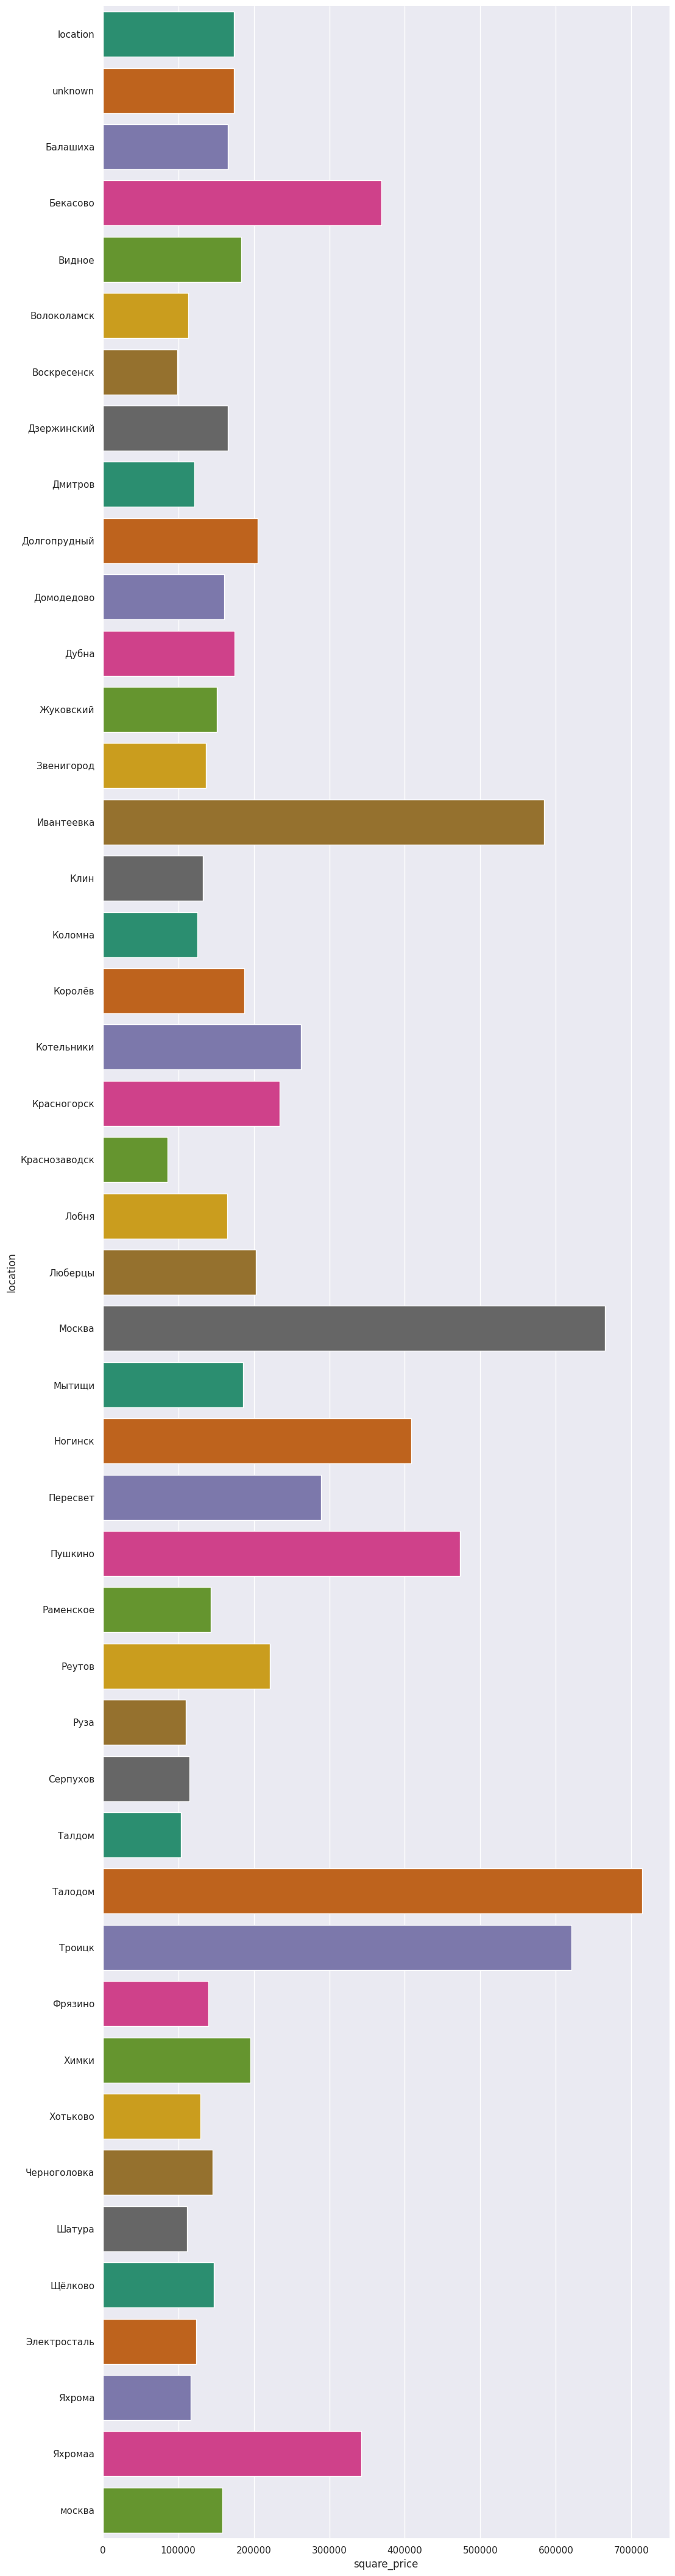

In [195]:
figsize = (12, 1.2 * len(locations['location'].unique()))
plt.figure(figsize=figsize)

# Создание barplot
sns.barplot(data=locations, x='square_price', y='location', palette='Dark2', estimator=np.mean)

# Удаление лишних осей
sns.despine(top=True, right=True, bottom=True, left=True)

# Вывод графика
plt.show()

In [157]:
df['square_price '] = df['square_price'].astype(int)

# Зависимости

In [158]:
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(df[categorical_columns])
df[categorical_columns] = encoded_data.astype(int)
df

,author,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,...,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex,square_price,square_price
0,363,2,32,1,1,6,6,1,20.7,2350000.0,...,3,18.0,1.0,3.00,240,342,1,163,113526.570048,113526
1,3377,4,32,1,1,1,9,1,33.0,4150000.0,...,1,18.0,6.0,2.70,2,160,14,163,125757.575758,125757
2,1021,5,32,1,1,4,4,1,14.0,1700000.0,...,1,25.0,9.5,2.75,119,335,1,163,121428.571429,121428
3,1303,7,32,1,1,5,5,1,17.5,2500000.0,...,1,25.0,9.5,2.75,240,1326,1,163,142857.142857,142857
4,2739,4,32,1,1,4,7,1,25.9,3000000.0,...,3,20.0,5.0,3.50,240,674,1,163,115830.115830,115830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10386,1,1,4,1,1,23,24,1,38.5,9363008.0,...,1,25.0,9.5,2.75,2,1461,27,7,243195.012987,243195
10387,3382,5,4,1,1,1,3,2,43.3,5750000.0,...,1,25.0,9.5,2.75,2,1252,314,163,132794.457275,132794
10388,44,4,4,1,1,8,8,2,60.0,9200000.0,...,1,25.0,9.5,2.75,2,907,36,270,153333.333333,153333
10389,3472,4,4,1,1,3,19,2,58.0,8200000.0,...,1,25.0,9.5,2.75,2,1002,72,1089,141379.310345,141379


<Axes: >

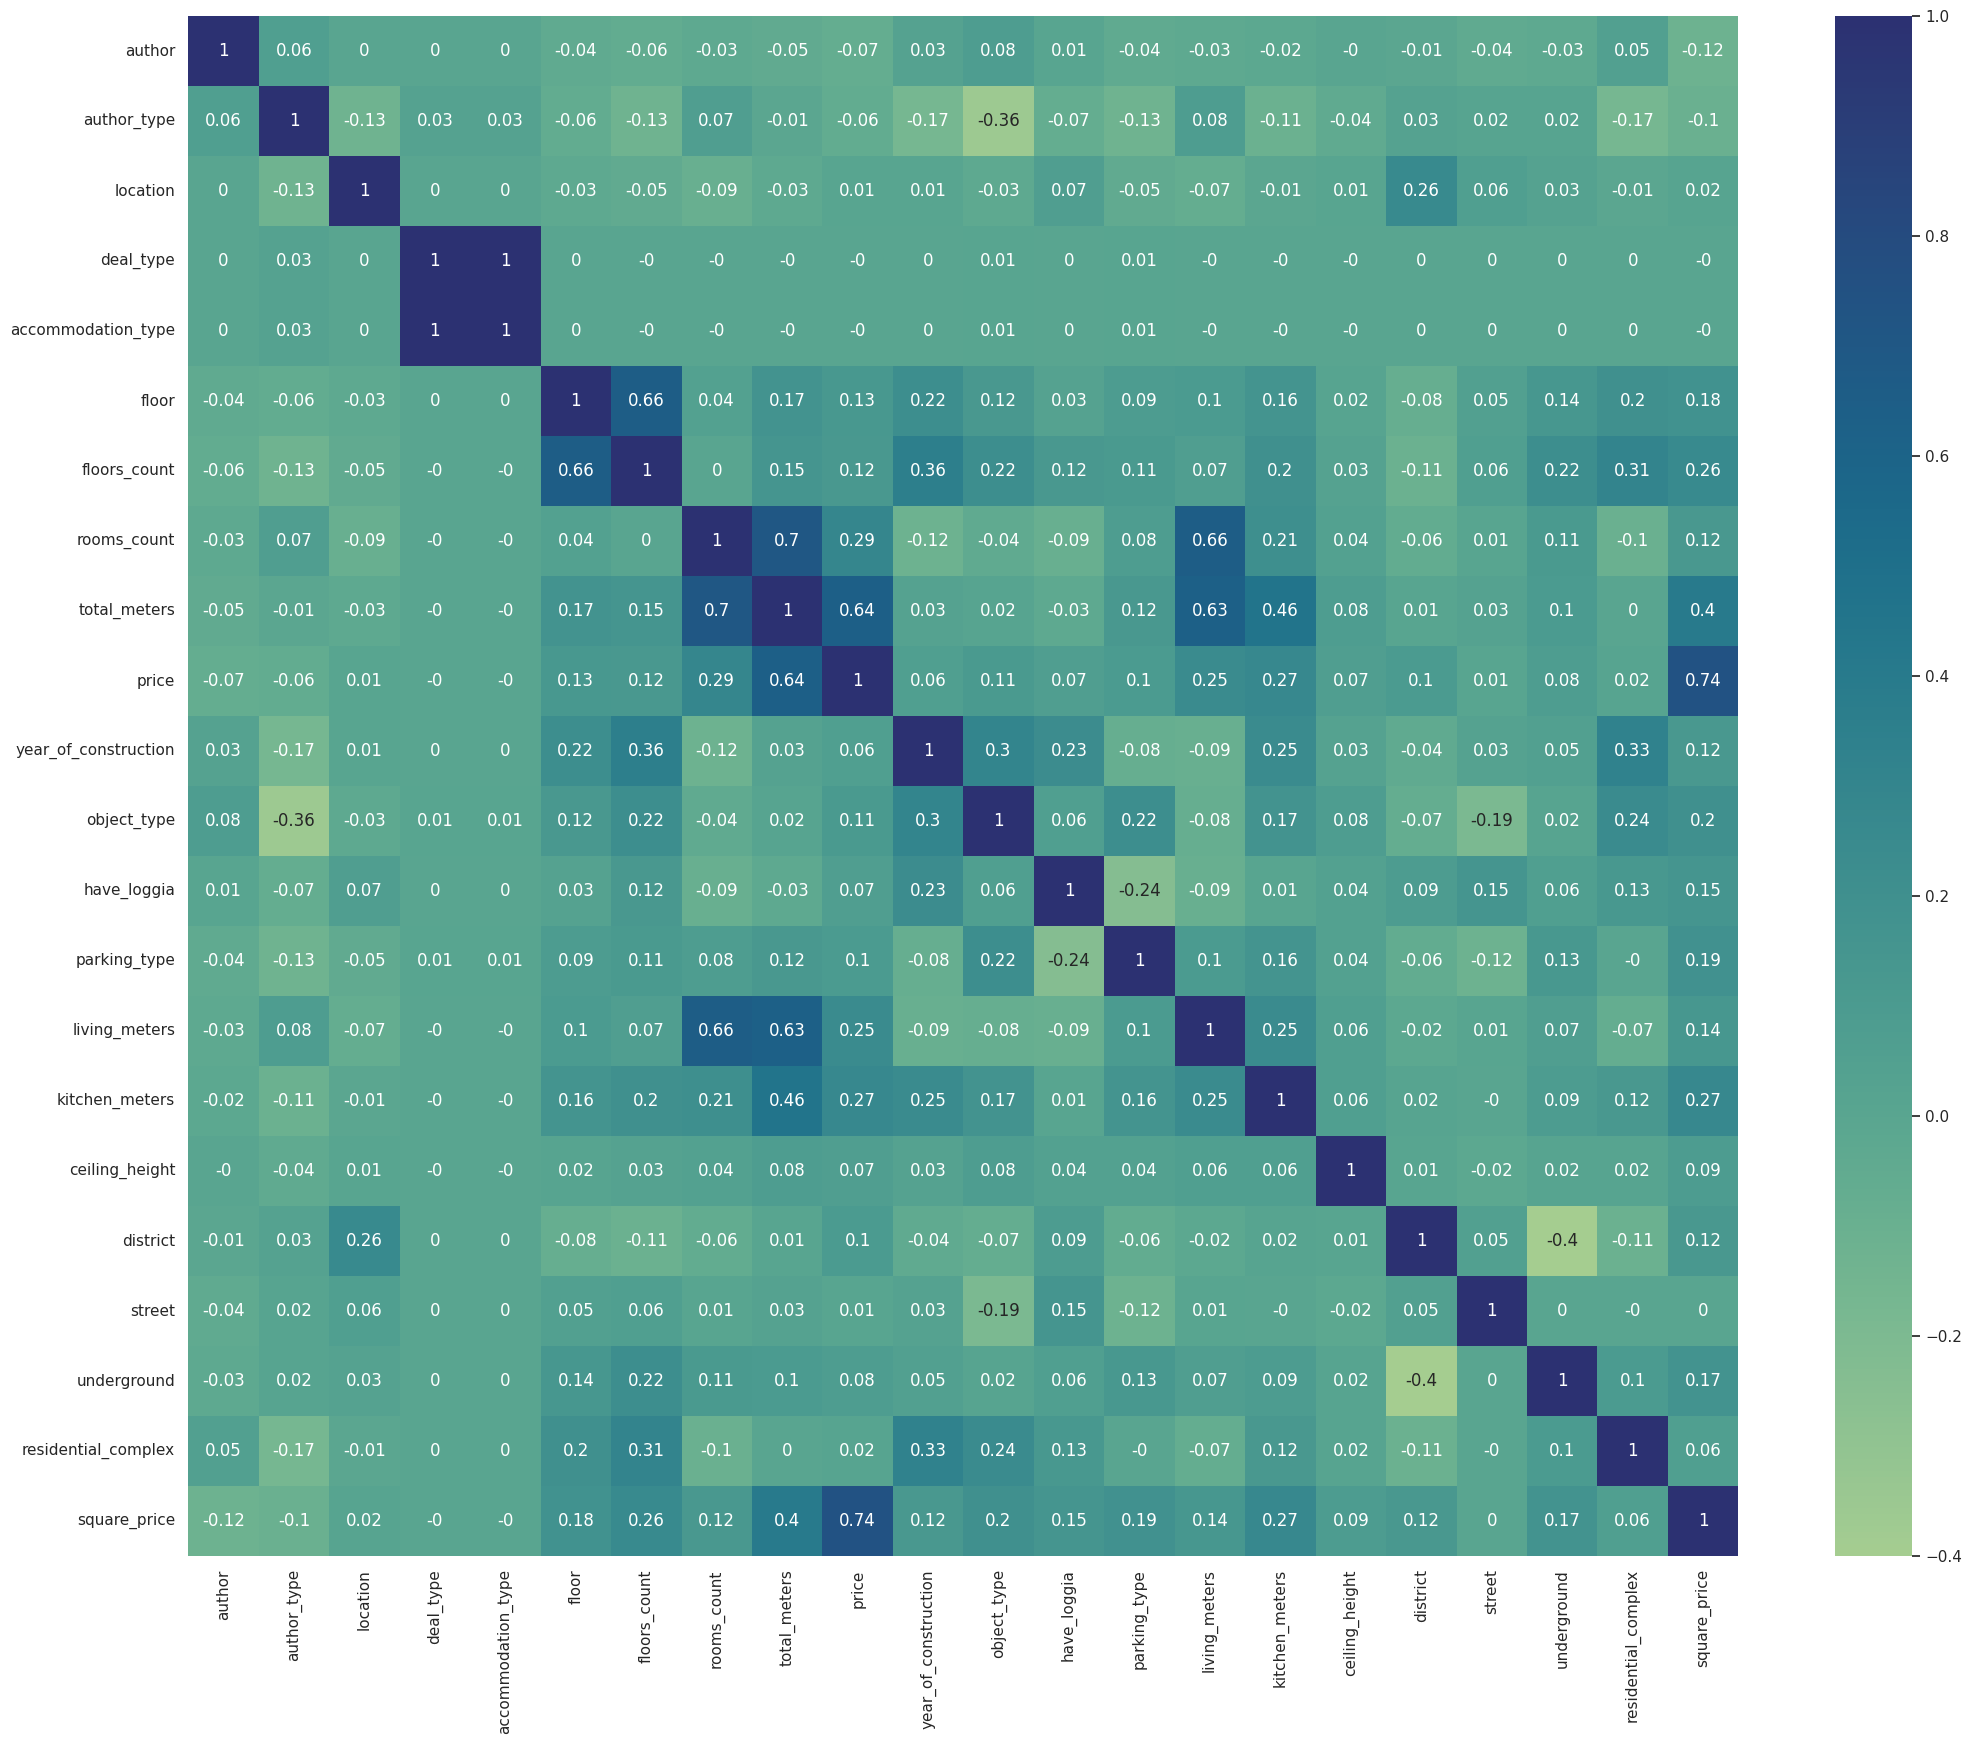

In [181]:
plt.figure(figsize = (25,20))
sns.heatmap(df.corr().round(2), cmap="crest", annot=True)

Данные корреляции в столбик:

In [190]:
corr_matrix = df.corr()['square_price'].round(2)
print(corr_matrix)

author                 -0.12
author_type            -0.10
location                0.02
deal_type              -0.00
accommodation_type     -0.00
floor                   0.18
floors_count            0.26
rooms_count             0.12
total_meters            0.40
price                   0.74
year_of_construction    0.12
object_type             0.20
have_loggia             0.15
parking_type            0.19
living_meters           0.14
kitchen_meters          0.27
ceiling_height          0.09
district                0.12
street                  0.00
underground             0.17
residential_complex     0.06
square_price            1.00
Name: square_price, dtype: float64


Больше всего вляет на square_price total_meters

Также положительную корреляцию имеют такие признаки как:


```
location                0.02
floor                   0.18
floors_count            0.26
rooms_count             0.12
total_meters            0.40
price                   0.74
year_of_construction    0.12
object_type             0.20
have_loggia             0.15
parking_type            0.19
living_meters           0.14
kitchen_meters          0.27
ceiling_height          0.09
district                0.12:
underground             0.17
residential_complex     0.06


```



# Выводы


✅ Загрузила и очистила данные от дубликатов


✅ Заполнила нулевые значения медианой, модой, а остальные 'unknown'


✅ Преобразовала тип данных некоторых колонок из object в int и float


✅ Посмотрела на выбросы, очистила от выбросов и проанализировала те выбросы, которые не видны на графиках


✅ Преобразовала тип данных некоторых колонок из object в int и float


✅ Посмотрела на выбросы, очистила от выбросов и проанализировала те выбросы, которые не видны на графиках


✅ Добавила колонку `'square_price'`, главную целевую переменную


✅ Визуализировала данные с помощью графиков, и вывела графики цены за квадратный метр в завивисимости от типа жилья, года, типа парковки, и локации


✅ Вывела матрицу корреляций и определила главные признаки, влияющие на целевую переменную `'square_price'`

